In [4]:
# !pip install -r requirements.txt

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from keras.saving import save_model

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Path to the dataset
data_dir = "trainee_dataset"

In [8]:
# Parameters for the image data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [9]:
# Creation of the model
model = models.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

In [10]:
# Model compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9145 - loss: 0.2115 - val_accuracy: 0.8932 - val_loss: 0.4795
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9531 - loss: 0.1367 - val_accuracy: 0.9010 - val_loss: 0.6133
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9764 - loss: 0.0762 - val_accuracy: 0.8984 - val_loss: 0.6155
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9867 - loss: 0.0533 - val_accuracy: 0.9010 - val_loss: 0.6390
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9834 - loss: 0.0540 - val_accuracy: 0.8828 - val_loss: 1.0165
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9864 - loss: 0.0382 - val_accuracy: 0.8750 - val_loss: 1.0193
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9979 - loss: 0.0108 - val_accuracy: 0.8828 - val_loss: 1.2050
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9991 - loss: 0.0066 - val_accuracy: 0.8854 - val_los

In [13]:
# Performance evaluation - calculating micro F1-score:
def calculate_micro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

# Receiving predictions
y_true = validation_generator.classes
y_pred = (model.predict(validation_generator) > 0.5).astype("int32")

# Calculating micro F1-score
f1 = calculate_micro_f1(y_true, y_pred)
print(f"Micro F1 Score: {f1}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 821ms/step
Micro F1 Score: 0.87


In [14]:
# Visualization of the training process
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

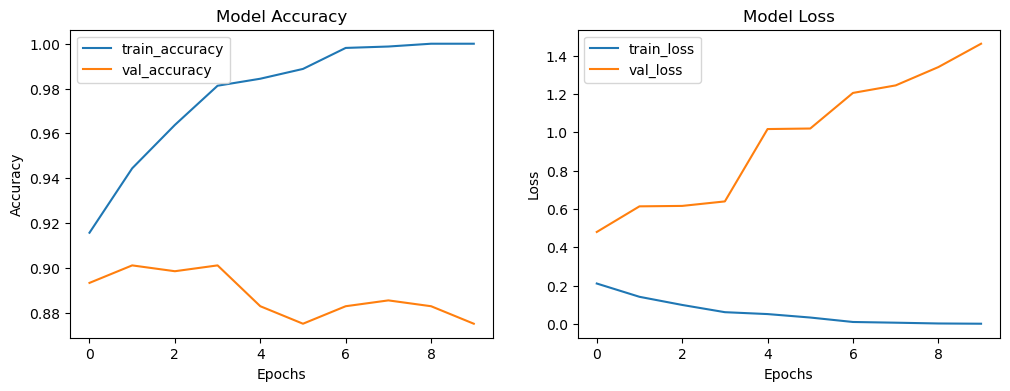

In [15]:
plot_training_history(history)

In [17]:
# Saving the model
save_model(model, "artifact_detection_model.keras")